Q-5. Uber is a taxi service provider as we know, we need to predict the high
booking area using an Unsupervised algorithm and price for the location using a
supervised algorithm and use some map function to display the data

In [157]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [158]:
df= pd.read_csv(r"C:\Users\Nirbhay\Downloads\rideshare_kaggle.csv")

In [159]:
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [160]:
df.shape

(693071, 57)

In [161]:
df.isnull().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

In [162]:
percent = (df.isnull().sum().sum()/len(df))*100
print("There is %s of null values in the datset" %percent)

There is 7.949402009317949 of null values in the datset


In [163]:
#dropping the null values
df.dropna(axis=0,inplace=True)

In [164]:
df.duplicated().sum()

0

In [168]:
df['source'].value_counts()

source
Financial District         54197
Back Bay                   53201
Theatre District           53201
Boston University          53172
North End                  53171
Fenway                     53166
Northeastern University    53164
South Station              53160
Haymarket Square           53147
West End                   52980
Beacon Hill                52841
North Station              52576
Name: count, dtype: int64

In [ ]:
#using map function to visuallize data

In [170]:
import geopandas as gpd
import folium
from folium.plugins import FastMarkerCluster
df1 = df[df['source']=='Fenway']
my_map = folium.Map(location=[df1["latitude"].mean(), df1["longitude"].mean()],zoom_start = 10)
my_map.add_child(FastMarkerCluster(df1[['latitude', 'longitude']].values.tolist(),color='green'))
my_map

In [169]:
pd.set_option('display.max_rows', 72)
df.groupby(by=["source","destination"]).price.agg(["mean"])

mean
source                  destination                       
Back Bay                Boston University        14.039392
                        Fenway                   13.658752
                        Haymarket Square         17.987384
                        North End                19.473019
                        Northeastern University  13.151040
                        South Station            17.700711
Beacon Hill             Boston University        16.376737
                        Fenway                   16.158840
                        Haymarket Square         13.799137
                        North End                15.270942
                        Northeastern University  16.471792
                        South Station            15.950661
Boston University       Back Bay                 13.992801
                        Beacon Hill              17.315535
                        Financial District       24.146085
                        North Station            20.185338
                        Theatre District         18.689557
                        West End                 18.611766
Fenway                  Back Bay                 13.802155
                        Beacon Hill              16.796674
                        Financial District       23.438818
                        North Station            19.701839
                        Theatre District         18.232722
                        West End                 18.161806
Financial District      Boston University        25.498434
                        Fenway                   23.404850
                        Haymarket Square         13.188209
                        North End                13.179635
                        Northeastern University  21.918584
                        South Station            12.349066
Haymarket Square        Back Bay                 16.860489
                        Beacon Hill              13.338559
                        Financial District       12.731618
                        North Station            12.332545
                        Theatre District         13.677272
                        West End                 12.529855
North End               Back Bay                 19.550935
                        Beacon Hill              15.982630
                        Financial District       13.417597
                        North Station            12.824092
                        Theatre District         15.169406
                        West End                 13.494873
North Station           Boston University        18.931558
                        Fenway                   18.547603
                        Haymarket Square         12.571791
                        North End                13.106641
                        Northeastern University  19.537848
                        South Station            15.374198
Northeastern University Back Bay                 13.698923
                        Beacon Hill              16.842433
                        Financial District       22.582094
                        North Station            19.910939
                        Theatre District         16.144805
                        West End                 18.204155
South Station           Back Bay                 19.103822
                        Beacon Hill              17.276304
                        Financial District       12.436910
                        North Station            15.746736
                        Theatre District         13.952579
                        West End                 15.881172
Theatre District        Boston University        20.360662
                        Fenway                   19.069278
                        Haymarket Square         15.204973
                        North End                15.159646
                        Northeastern University  16.910751
                        South Station            12.888926
West End                Boston University 

In [172]:
print('Maximum price in the data :',df.price.max())
df[df['price']==df.price.max()]

Maximum price in the data : 97.5


,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
597071,ba1593a1-e4fd-4c7a-a011-e2d4fccbf081,1.543714e+09,1,2,12,2018-12-02 01:28:02,America/New_York,Financial District,Fenway,Lyft,...,0.0,1543683600,31.57,1543665600,44.65,1543690800,28.1,1543658400,43.98,1543690800


In [173]:
df[df['price']==df.price.max()][['latitude','longitude']]

,latitude,longitude
597071,42.3503,-71.081


In [175]:
map1 = folium.Map(location=(42.3503,-71.081),zoom_start = 10)
folium.Marker(location=(42.3503,-71.081)).add_to(map1) # Fenway
folium.Marker(location=(42.3378,-71.066)).add_to(map1) # Financial District
display(map1)

In [176]:
#Deleting some unwanted features
df = df.drop(['id','timestamp','long_summary','apparentTemperatureHighTime','apparentTemperatureLowTime',
                  'apparentTemperatureLowTime','windGustTime','sunriseTime','sunsetTime','uvIndexTime','temperatureMinTime',
                 'temperatureMaxTime','apparentTemperatureMinTime','temperatureLowTime','apparentTemperatureMaxTime'
                 ,'latitude','longitude','product_id'],axis = 1)
print(df.shape)
df.head()

(637976, 40)


,hour,day,month,datetime,timezone,source,destination,cab_type,name,price,...,cloudCover,uvIndex,visibility.1,ozone,moonPhase,precipIntensityMax,temperatureMin,temperatureMax,apparentTemperatureMin,apparentTemperatureMax
0,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,Shared,5.0,...,0.72,0,10.000,303.8,0.30,0.1276,39.89,43.68,33.73,38.07
1,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,Lux,11.0,...,1.00,0,4.786,291.1,0.64,0.1300,40.49,47.30,36.20,43.92
2,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,Lyft,7.0,...,0.03,0,10.000,315.7,0.68,0.1064,35.36,47.55,31.04,44.12
3,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,...,0.00,0,10.000,291.1,0.75,0.0000,34.67,45.03,30.30,38.53
4,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,Lyft XL,9.0,...,0.44,0,10.000,347.7,0.72,0.0001,33.10,42.18,29.11,35.75


In [177]:
df['year'] = df['datetime'].apply(lambda x: x.split('-')[0])
df["year"].unique()

array(['2018'], dtype=object)

In [178]:
#since all the data is in 2018 nso droping the datetime and year column
df = df.drop(['datetime','year'],axis = 1)

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 637976 entries, 0 to 693070
Data columns (total 39 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   hour                     637976 non-null  int64  
 1   day                      637976 non-null  int64  
 2   month                    637976 non-null  int64  
 3   timezone                 637976 non-null  object 
 4   source                   637976 non-null  object 
 5   destination              637976 non-null  object 
 6   cab_type                 637976 non-null  object 
 7   name                     637976 non-null  object 
 8   price                    637976 non-null  float64
 9   distance                 637976 non-null  float64
 10  surge_multiplier         637976 non-null  float64
 11  temperature              637976 non-null  float64
 12  apparentTemperature      637976 non-null  float64
 13  short_summary            637976 non-null  object 
 14  precipInt

In [180]:
#Checking the relation of price with temperature variables
df_temp = df[['price','temperature','apparentTemperature','temperatureHigh','temperatureLow','apparentTemperatureHigh',
                'apparentTemperatureLow','temperatureMin','temperatureHighTime','temperatureMax','apparentTemperatureMin','apparentTemperatureMax']]
df_temp.head()

,price,temperature,apparentTemperature,temperatureHigh,temperatureLow,apparentTemperatureHigh,apparentTemperatureLow,temperatureMin,temperatureHighTime,temperatureMax,apparentTemperatureMin,apparentTemperatureMax
0,5.0,42.34,37.12,43.68,34.19,37.95,27.39,39.89,1544968800,43.68,33.73,38.07
1,11.0,43.58,37.35,47.30,42.10,43.92,36.20,40.49,1543251600,47.30,36.20,43.92
2,7.0,38.33,32.93,47.55,33.10,44.12,29.11,35.36,1543320000,47.55,31.04,44.12
3,26.0,34.38,29.63,45.03,28.90,38.53,26.20,34.67,1543510800,45.03,30.30,38.53
4,9.0,37.44,30.88,42.18,36.71,35.75,30.29,33.10,1543420800,42.18,29.11,35.75


<AxesSubplot: >

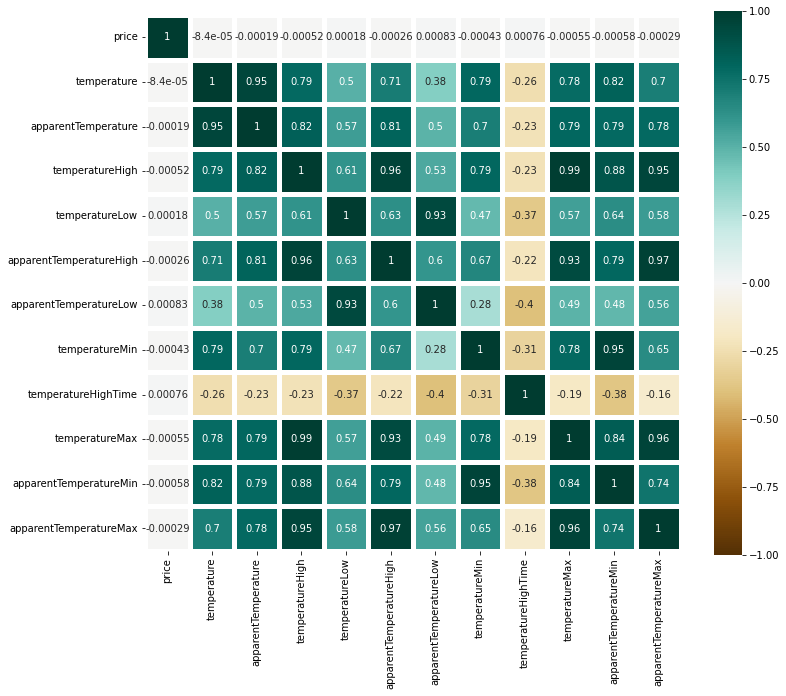

In [181]:
plt.figure(figsize=(12,10))
sns.heatmap(df_temp.corr(),annot=True,square=True,center=0,vmin=-1,vmax=1,
            cmap='BrBG',linewidths=5)

In [182]:
##all the temperaature features have very low correlation with the target coloumn price
#hence dropping all of them
df = df.drop(df_temp.columns[1:],axis=1)
df.head()

,hour,day,month,timezone,source,destination,cab_type,name,price,distance,...,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,moonPhase,precipIntensityMax
0,9,16,12,America/New_York,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,...,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,0.30,0.1276
1,2,27,11,America/New_York,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,...,rain,41.83,1003.97,90,1.00,0,4.786,291.1,0.64,0.1300
2,1,28,11,America/New_York,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,...,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,0.68,0.1064
3,4,30,11,America/New_York,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,...,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,0.75,0.0000
4,3,29,11,America/New_York,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,...,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,0.72,0.0001


In [183]:
num_col = df.select_dtypes(include=['int64','float64']).columns.tolist()
df_num = df[num_col]
df_num.columns

Index(['hour', 'day', 'month', 'price', 'distance', 'surge_multiplier',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'visibility', 'dewPoint', 'pressure', 'windBearing',
       'cloudCover', 'uvIndex', 'visibility.1', 'ozone', 'moonPhase',
       'precipIntensityMax'],
      dtype='object')

In [184]:
corr_matrix = df_num.corr()
corr_with_target = abs(corr_matrix['price'])
# Identify columns with correlation less than 5%
cols_to_drop = corr_with_target[corr_with_target < 0.05].index

In [185]:
cols_to_drop

Index(['hour', 'day', 'month', 'precipIntensity', 'precipProbability',
       'humidity', 'windSpeed', 'windGust', 'visibility', 'dewPoint',
       'pressure', 'windBearing', 'cloudCover', 'uvIndex', 'visibility.1',
       'ozone', 'moonPhase', 'precipIntensityMax'],
      dtype='object')

In [186]:
df = df.drop(cols_to_drop,axis=1)
df.head()

,timezone,source,destination,cab_type,name,price,distance,surge_multiplier,short_summary,icon
0,America/New_York,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,1.0,Mostly Cloudy,partly-cloudy-night
1,America/New_York,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,1.0,Rain,rain
2,America/New_York,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,1.0,Clear,clear-night
3,America/New_York,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,1.0,Clear,clear-night
4,America/New_York,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,1.0,Partly Cloudy,partly-cloudy-night


In [187]:
df.shape

(637976, 10)

In [188]:
cat_col = df.select_dtypes(include=['object','category']).columns.tolist()
df_cat = df[cat_col]
df_cat.head()

,timezone,source,destination,cab_type,name,short_summary,icon
0,America/New_York,Haymarket Square,North Station,Lyft,Shared,Mostly Cloudy,partly-cloudy-night
1,America/New_York,Haymarket Square,North Station,Lyft,Lux,Rain,rain
2,America/New_York,Haymarket Square,North Station,Lyft,Lyft,Clear,clear-night
3,America/New_York,Haymarket Square,North Station,Lyft,Lux Black XL,Clear,clear-night
4,America/New_York,Haymarket Square,North Station,Lyft,Lyft XL,Partly Cloudy,partly-cloudy-night


In [189]:
for col in df_cat:
    print(f'{col} : {df_cat[col].unique()}')
    print()

timezone : ['America/New_York']

source : ['Haymarket Square' 'Back Bay' 'North End' 'North Station' 'Beacon Hill'
 'Boston University' 'Fenway' 'South Station' 'Theatre District'
 'West End' 'Financial District' 'Northeastern University']

destination : ['North Station' 'Northeastern University' 'West End' 'Haymarket Square'
 'South Station' 'Fenway' 'Theatre District' 'Beacon Hill' 'Back Bay'
 'North End' 'Financial District' 'Boston University']

cab_type : ['Lyft' 'Uber']

name : ['Shared' 'Lux' 'Lyft' 'Lux Black XL' 'Lyft XL' 'Lux Black' 'UberXL'
 'Black' 'UberX' 'WAV' 'Black SUV' 'UberPool']

short_summary : [' Mostly Cloudy ' ' Rain ' ' Clear ' ' Partly Cloudy ' ' Overcast '
 ' Light Rain ' ' Foggy ' ' Possible Drizzle ' ' Drizzle ']

icon : [' partly-cloudy-night ' ' rain ' ' clear-night ' ' cloudy ' ' fog '
 ' clear-day ' ' partly-cloudy-day ']



In [190]:
#We can see that 'timezone' feature has only 1 value  
#hence dropping it
df = df.drop(['timezone'],axis=1)

In [191]:
new_cat = ['source',
 'destination',
 'cab_type',
 'name',
 'short_summary',
 'icon','price']

df_cat = df[new_cat]
df_cat.head()

,source,destination,cab_type,name,short_summary,icon,price
0,Haymarket Square,North Station,Lyft,Shared,Mostly Cloudy,partly-cloudy-night,5.0
1,Haymarket Square,North Station,Lyft,Lux,Rain,rain,11.0
2,Haymarket Square,North Station,Lyft,Lyft,Clear,clear-night,7.0
3,Haymarket Square,North Station,Lyft,Lux Black XL,Clear,clear-night,26.0
4,Haymarket Square,North Station,Lyft,Lyft XL,Partly Cloudy,partly-cloudy-night,9.0


In [192]:
##encoding the categorical features
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

df_cat_encode= df_cat.copy()
for col in df_cat_encode.select_dtypes(include='O').columns:
    df_cat_encode[col]=le.fit_transform(df_cat_encode[col])

In [193]:
df_cat_encode

,source,destination,cab_type,name,short_summary,icon,price
0,5,7,0,7,4,5,5.0
1,5,7,0,2,8,6,11.0
2,5,7,0,5,0,1,7.0
3,5,7,0,4,0,1,26.0
4,5,7,0,6,6,5,9.0
...,...,...,...,...,...,...,...
693065,11,6,1,11,6,5,9.5
693066,11,6,1,10,6,5,13.0
693067,11,6,1,9,6,5,9.5
693069,11,6,1,1,6,5,27.0


<AxesSubplot: >

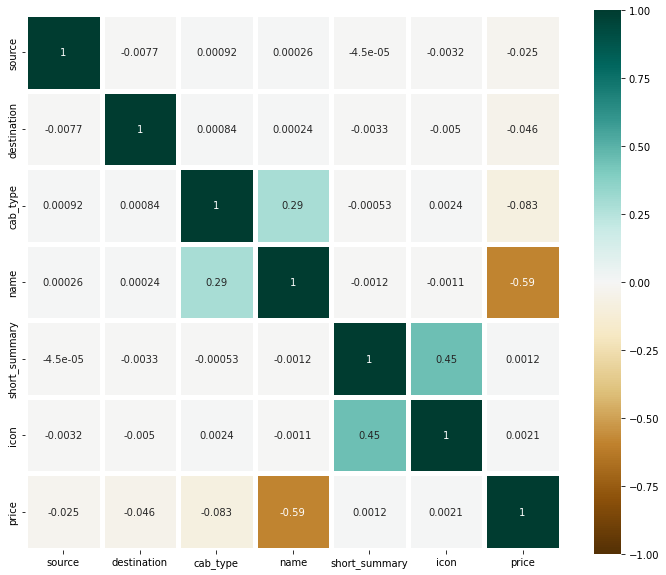

In [194]:
plt.figure(figsize=(12,10))
sns.heatmap(df_cat_encode.corr(),annot=True,square=True,center=0,vmin=-1,vmax=1,
            cmap='BrBG',linewidths=5)

In [195]:
#dropping sorce, destination, short summary and icon as it has very less correlation
df = df.drop(['source','destination','short_summary','icon'],axis=1)
df.head()

,cab_type,name,price,distance,surge_multiplier
0,Lyft,Shared,5.0,0.44,1.0
1,Lyft,Lux,11.0,0.44,1.0
2,Lyft,Lyft,7.0,0.44,1.0
3,Lyft,Lux Black XL,26.0,0.44,1.0
4,Lyft,Lyft XL,9.0,0.44,1.0


**Checking and Removing Outliers using IQR method**

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

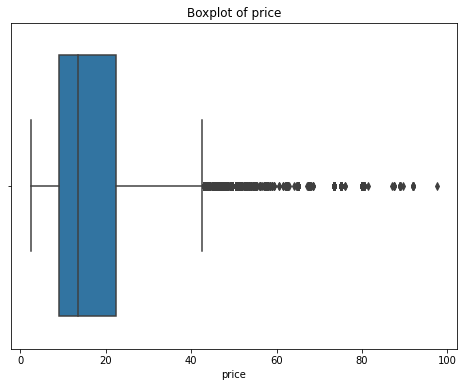

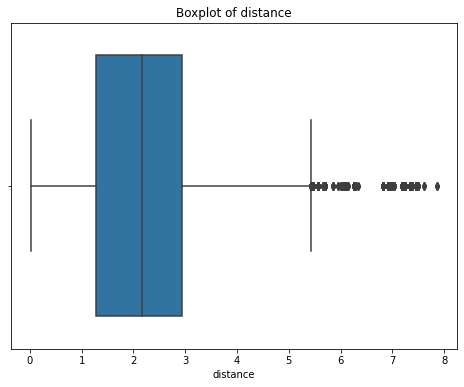

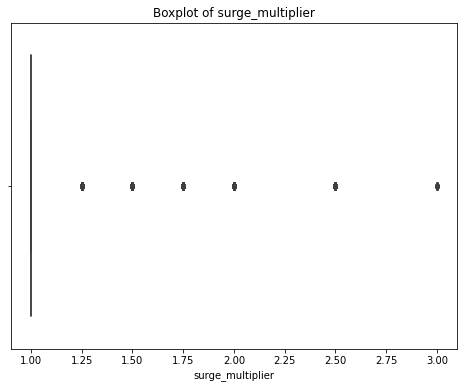

In [196]:
for column in df.columns:
    plt.figure(figsize=(8, 6))
    
    if df[column].dtype != 'object':
        # Handle numerical variables
        sns.boxplot(x=df[column])
        plt.title(f'Boxplot of {column}')
        plt.xlabel(column)
    
    plt.show()

In [197]:
IQR = df['price'].quantile(0.75) - df['price'].quantile(0.25)
lower_fence = df['price'].quantile(0.25) - (1.5 * IQR)
higher_fence = df['price'].quantile(0.75) + (1.5 * IQR)

In [198]:
df[df['price']>=(higher_fence)]

,cab_type,name,price,distance,surge_multiplier
706,Lyft,Lux Black,52.5,3.25,2.00
707,Lyft,Lux Black XL,67.5,3.25,2.00
769,Lyft,Lux Black XL,45.5,4.76,1.00
1094,Lyft,Lux Black XL,45.5,4.31,1.00
1318,Lyft,Lux Black XL,45.5,5.33,1.00
...,...,...,...,...,...
692439,Uber,Black SUV,47.0,5.56,1.00
692698,Lyft,Lux Black XL,52.5,4.58,1.25
692891,Lyft,Lux Black XL,47.5,5.42,1.00
692962,Uber,Black SUV,51.0,7.36,1.00


In [199]:
df[df['price']<=(lower_fence)]

,cab_type,name,price,distance,surge_multiplier


In [200]:
#above daata is the outlier
print('Size before removing :',df.shape)
df= df[~((df['price']>=(higher_fence)))]
print('Size after removing :',df.shape)

Size before removing : (637976, 5)
Size after removing : (632387, 5)


<AxesSubplot: xlabel='price'>

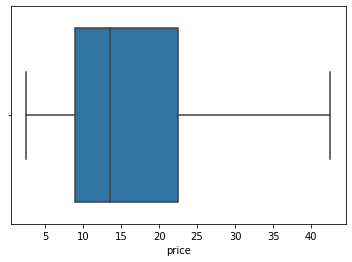

In [201]:
 sns.boxplot(x=df['price'])

**Model Dvelopment**

In [202]:
def one_hot_encoder(data,feature,keep_first=True):

    one_hot_cols = pd.get_dummies(data[feature])
    
    for col in one_hot_cols.columns:
        one_hot_cols.rename({col:f'{feature}_'+col},axis=1,inplace=True)
    
    new_data = pd.concat([data,one_hot_cols],axis=1)
    new_data.drop(feature,axis=1,inplace=True)
    
    if keep_first == False:
        new_data=new_data.iloc[:,1:]
    
    return new_data

In [203]:
df_onehot=df.copy()
for col in df_onehot.select_dtypes(include='O').columns:
    df_onehot=one_hot_encoder(df_onehot,col)

,price,distance,surge_multiplier,cab_type_Lyft,cab_type_Uber,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV
0,5.0,0.44,1.0,True,False,False,False,False,False,False,False,False,True,False,False,False,False
1,11.0,0.44,1.0,True,False,False,False,True,False,False,False,False,False,False,False,False,False
2,7.0,0.44,1.0,True,False,False,False,False,False,False,True,False,False,False,False,False,False
3,26.0,0.44,1.0,True,False,False,False,False,False,True,False,False,False,False,False,False,False
4,9.0,0.44,1.0,True,False,False,False,False,False,False,False,True,False,False,False,False,False


In [207]:
df_onehot = df_onehot.replace({True: 1, False: 0})

In [208]:
df_onehot.head()

,price,distance,surge_multiplier,cab_type_Lyft,cab_type_Uber,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV
0,5.0,0.44,1.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,11.0,0.44,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
2,7.0,0.44,1.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
3,26.0,0.44,1.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
4,9.0,0.44,1.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


In [209]:
##predicting the price using supervised ML algorithm
from sklearn.model_selection import train_test_split
X = df_onehot.drop(columns=['price'],axis=1).values
y = df_onehot['price'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [210]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn.metrics import r2_score

In [213]:
##linear regression
regression=LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

LINEAR REGRESSION RESULTS 

Intercept is : 145764831871.8848
Coefficient is : [ 2.66634145e+00  1.36639340e+01 -1.73539272e+11 -1.00712846e+11
 -4.50519861e+10 -4.50519861e+10  2.77744401e+10  2.77744402e+10
  2.77744402e+10  2.77744401e+10  2.77744401e+10  2.77744401e+10
 -4.50519861e+10 -4.50519861e+10 -4.50519861e+10 -4.50519861e+10]

    Actual  Predicted
0    38.5  30.692688
1    42.5  37.477844
2     7.0   8.286560
3     6.5   6.159088
4     9.0   7.875488
 
 Mean Square Error =  5.108355131502384
 
 Mean Absolute Error =  1.6760495620164775
 
 Root Mean Square Error =  2.260167058317235
 
 R-Square =  0.9337792677631576
 
 Adjusted R square =  0.9337736824615456


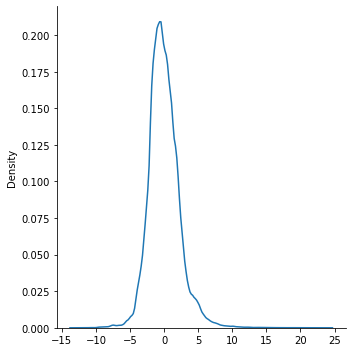

In [225]:
print("LINEAR REGRESSION RESULTS \n")
#inntercept and coefficients
print('Intercept is :',regression.intercept_)
print('Coefficient is :',regression.coef_)   

## Prediction for the test data
reg_pred=regression.predict(X_test)

data1 = pd.DataFrame({'Actual': y_test, 'Predicted': reg_pred})    
print("\n",data1.head())

##residuals
residuals1=y_test-reg_pred
sns.displot(residuals1,kind="kde")

## Performance Metrics
print(" \n Mean Square Error = ",mean_squared_error(y_test,reg_pred))
print(" \n Mean Absolute Error = ",mean_absolute_error(y_test,reg_pred))
print(" \n Root Mean Square Error = ",np.sqrt(mean_squared_error(y_test,reg_pred)))


#R square
score=r2_score(y_test,reg_pred)
print(" \n R-Square = ",score)


## Adjusted R square
print(" \n Adjusted R square = ",1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

Report = []
Report.append({'Model':'Linear Regression',
               "Mean Square Error " : mean_squared_error(y_test,reg_pred),
               "Mean Absolute Error " : mean_absolute_error(y_test,reg_pred),
               "Root Mean Square Error ": np.sqrt(mean_squared_error(y_test,reg_pred)),
               " R-Square ": score,
               "Adjusted R square ": 1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
               })

In [226]:
#ridge regression
from sklearn.linear_model import Ridge
ridge=Ridge()
ridge.fit(X_train,y_train)

Ridge()

RIDGE REGRESSION RESULTS 

Intercept is : -3.2338335362701756
Coefficient is : [  2.6663292   13.65446435   0.43946797  -0.43946797   4.67717956
  14.2659659    0.54188409   5.7028603   14.35193007  -7.59636259
  -1.911124   -10.64971989  -7.07554254  -6.0582576   -0.18841481
  -6.06039847]

    Actual  Predicted
0    38.5  30.694504
1    42.5  37.477143
2     7.0   8.289356
3     6.5   6.158542
4     9.0   7.876486
 
 Mean Square Error =  5.108383673569733
 
 Mean Absolute Error =  1.6759591209928033
 
 Root Mean Square Error =  2.260173372458346
 
 R-Square =  0.9337788977660546
 
 Adjusted R square =  0.9337733124332357


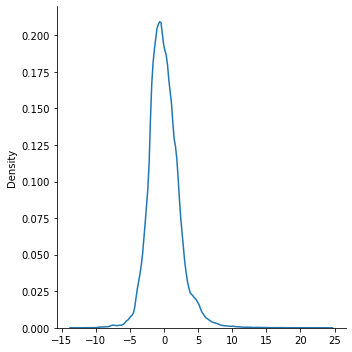

In [227]:
print("RIDGE REGRESSION RESULTS \n")

#inntercept and coefficients
print('Intercept is :',ridge.intercept_)
print('Coefficient is :',ridge.coef_) 

## Prediction for the test data
ridge_pred=ridge.predict(X_test)

data2 = pd.DataFrame({'Actual': y_test, 'Predicted': ridge_pred})    
print("\n",data2.head())


##residuals
residuals2=y_test-ridge_pred
sns.displot(residuals2,kind="kde")

## Performance Metrics
print(" \n Mean Square Error = ",mean_squared_error(y_test,ridge_pred))
print(" \n Mean Absolute Error = ",mean_absolute_error(y_test,ridge_pred))
print(" \n Root Mean Square Error = ",np.sqrt(mean_squared_error(y_test,ridge_pred)))


#R square
score2=r2_score(y_test,ridge_pred)
print(" \n R-Square = ",score2)


## Adjusted R square
print(" \n Adjusted R square = ",1 - (1-score2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

Report.append({'Model':'Ridge Regression',
               "Mean Square Error " : mean_squared_error(y_test,ridge_pred),
               "Mean Absolute Error " : mean_absolute_error(y_test,ridge_pred),
               "Root Mean Square Error ": np.sqrt(mean_squared_error(y_test,ridge_pred)),
               " R-Square ": score2,
               "Adjusted R square ": 1 - (1-score2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
               })


In [228]:
#lasso regression
from sklearn.linear_model import Lasso

Lasso = Lasso()
Lasso.fit(X_train, y_train)

Lasso()

LASSO REGRESSION RESULTS 

Intercept is : 12.172652815848423
Coefficient is : [ 1.70934526  0.          0.         -0.          0.          2.30199388
  0.          0.          1.93187095 -0.         -0.         -0.
 -0.         -0.         -0.         -0.        ]

    Actual  Predicted
0    38.5  21.232183
1    42.5  21.967512
2     7.0  17.351969
3     6.5  14.258054
4     9.0  15.129820
 
 Mean Square Error =  60.86618835432704
 
 Mean Absolute Error =  6.582455836991711
 
 Root Mean Square Error =  7.801678560048924
 
 R-Square =  0.21097819992329025
 
 Adjusted R square =  0.21091165090483355


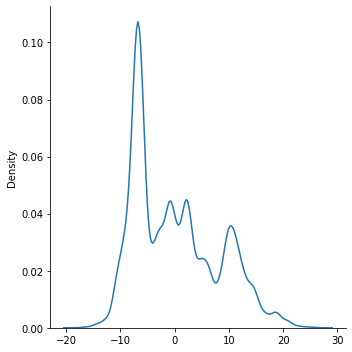

In [229]:
print("LASSO REGRESSION RESULTS \n")

#inntercept and coefficients
print('Intercept is :',Lasso.intercept_)
print('Coefficient is :',Lasso.coef_)

## Prediction for the test data
Lasso_pred=Lasso.predict(X_test)

data3 = pd.DataFrame({'Actual': y_test, 'Predicted': Lasso_pred})    
print("\n",data3.head())

##residuals
residuals3=y_test-Lasso_pred
sns.displot(residuals3,kind="kde")


## Performance Metrics
print(" \n Mean Square Error = ",mean_squared_error(y_test,Lasso_pred))
print(" \n Mean Absolute Error = ",mean_absolute_error(y_test,Lasso_pred))
print(" \n Root Mean Square Error = ",np.sqrt(mean_squared_error(y_test,Lasso_pred)))


#R square
score3=r2_score(y_test,Lasso_pred)
print(" \n R-Square = ",score3)


## Adjusted R square
print(" \n Adjusted R square = ",1 - (1-score3)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

Report.append({'Model':'Lasso Regression',
               "Mean Square Error " : mean_squared_error(y_test,Lasso_pred),
               "Mean Absolute Error " : mean_absolute_error(y_test,Lasso_pred),
               "Root Mean Square Error ": np.sqrt(mean_squared_error(y_test,Lasso_pred)),
               " R-Square ": score3,
               "Adjusted R square ": 1 - (1-score3)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
               })


In [231]:
report = pd.DataFrame(Report)

In [232]:
report

,Model,Mean Square Error,Mean Absolute Error,Root Mean Square Error,R-Square,Adjusted R square
0,Linear Regression,5.108355,1.676050,2.260167,0.933779,0.933774
1,Ridge Regression,5.108384,1.675959,2.260173,0.933779,0.933773
2,Lasso Regression,60.866188,6.582456,7.801679,0.210978,0.210912


In [237]:
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV,ShuffleSplit

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {    
                'fit_intercept': [True, False],
                'n_jobs': [1, -1],
                'positive': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

import warnings
warnings.filterwarnings('ignore')

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.933466,"{'fit_intercept': False, 'n_jobs': 1, 'positiv..."
1,lasso,0.211560,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.964466,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


For predicting the price , the best model is Decision Tree Regressor model.